In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

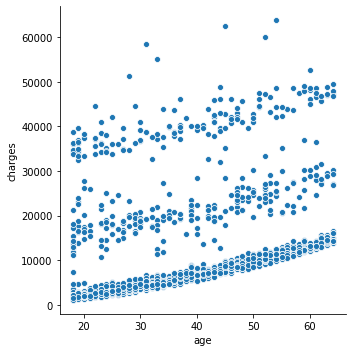

In [5]:
sns.relplot("age","charges",data =df)

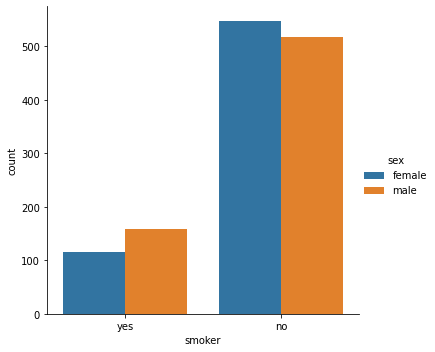

In [6]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)

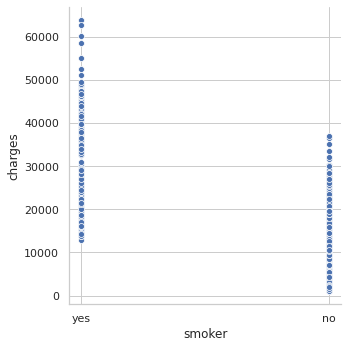

In [7]:
sns.set(style="whitegrid")
sns.relplot("smoker","charges",data =df)

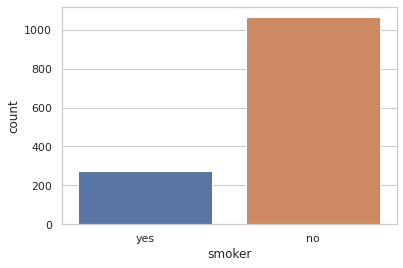

In [8]:
sns.countplot("smoker",data=df)

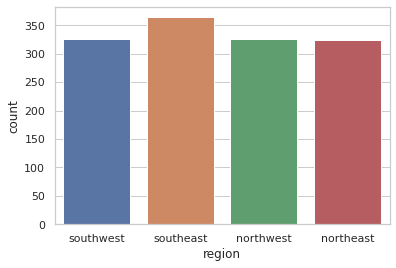

In [9]:
sns.countplot("region",data=df)

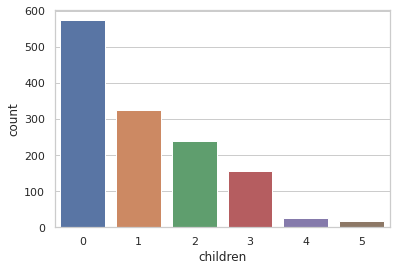

In [10]:
sns.countplot("children",data=df)

In [11]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [12]:
def smoker(yes):
    if yes =="yes":
        return 1
    else:
        return 0
df["smoker"]=df["smoker"].apply(smoker)

def sex(s):
    if s =="male":
        return 1
    else:
        return 0
df["sex"]=df["sex"].apply(sex)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
x = df.drop(["charges","region"], axis=1)

In [15]:
y = df["charges"]

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [17]:
x

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [19]:
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print ('acc : ',model.score(X_test,Y_test))
print ('intercept : ',model.intercept_)
print ('coefficient : ',model.coef_)

acc :  0.7978644236809904
intercept :  -11901.104558765432
coefficient :  [ 2.54952280e+02 -2.34557931e+01  3.20693337e+02  4.30809389e+02
  2.35890247e+04]


In [20]:
df_op = pd.DataFrame({'Predicted' : Y_pred,'Actual' : Y_test})

In [21]:
df_op.head()

,Predicted,Actual
578,11448.706394,9724.53000
610,9931.225316,8547.69130
569,37772.717806,45702.02235
1034,15935.739026,12950.07120
198,6889.976472,9644.25250


In [22]:
rows , columns = df_op.shape
rows 

268

In [23]:
metrics.mean_absolute_error(Y_test, Y_pred)

3939.7808069668295

In [24]:
metrics.mean_squared_error(Y_test, Y_pred)

32165826.64360513

## Decision Tree

In [25]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
df_op = pd.DataFrame({'Predicted' : Y_pred,'Actual' : Y_test})
clf.score(X_test,Y_test)*100
#df_op

73.38178803341869

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 0,
                              n_jobs = -1)
forest.fit(X_train,Y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)
forest.score(X_test,Y_test)

0.8732803644278508

In [27]:
df_op = pd.DataFrame({'Predicted' : forest_test_pred,'Actual' : Y_test})
df_op

,Predicted,Actual
578,10813.733219,9724.53000
610,10296.018282,8547.69130
569,44786.483576,45702.02235
1034,13155.127199,12950.07120
198,9329.787737,9644.25250
...,...,...
1084,16812.232127,15019.76005
726,6495.905119,6664.68595
1132,11191.994823,20709.02034
725,43701.809050,40932.42950


In [28]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
metrics.mean_squared_error(Y_train,forest_train_pred),
metrics.mean_squared_error(Y_test,forest_test_pred)))


MSE train data: 3940743.072, MSE test data: 20164890.834


## K Nearest Neighbour

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:

max_accuracy = 0

for x in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=x)
    knn.fit(X_train,Y_train)
    Y_pred_knn = knn.predict(X_test)
    current_accuracy = knn.score(X_test,Y_test)*100
                                 
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
    #print(current_accuracy)
    #print(x)
        
print(max_accuracy)
print(best_x)

32.68497951094896
2


## Support Vector Machine

In [31]:
from sklearn import svm

sv = svm.SVR(kernel='rbf')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)

In [32]:
Y_pred_svm.shape

(268,)

In [33]:
sv.score(X_test,Y_test)*100

-10.353897216046315